In [13]:
which_jets = 'maxbtag'
gnn_bkg = Bkg(get_qcd_ttbar(which_jets), gnn=True)

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/QCD/QCD_bEnriched_HT100to200_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/QCD/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/QCD/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/QCD/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/QCD/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/QCD/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/QCD/QCD_bEnriched_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
/eos/uscms/store/user/srosenzw/sixb/

In [14]:
# def get_region_masks(HX_m, H1_m, H2_m):
def get_ar_vr_mask(tree, mh=125, m=178):
    dM_mh = np.sqrt((tree.HX.m - mh)**2 + (tree.H1.m - mh)**2 + (tree.H2.m - mh)**2)
    ar_mask = dM_mh < 50
    dM_m = np.sqrt((tree.HX.m - m)**2 + (tree.H1.m - m)**2 + (tree.H2.m - m)**2)
    vr_mask = dM_m < 50
    return ar_mask, vr_mask

In [15]:
# def get_region_masks(HX_m, H1_m, H2_m):
def get_region_masks(tree):
    dM_125 = np.sqrt((tree.HX.m - 125)**2 + (tree.H1.m - 125)**2 + (tree.H2.m - 125)**2)
    asr_mask = dM_125 < 25
    acr_mask = ~asr_mask & (dM_125 < 50)
    return asr_mask, acr_mask

In [16]:
gnn_ar_mask, gnn_vr_mask = get_ar_vr_mask(gnn_bkg)

In [48]:
nbins = 21

variables = [
    gnn_bkg.HX.pt, gnn_bkg.H1.pt, gnn_bkg.H2.pt, 
    gnn_bkg.HX.eta, gnn_bkg.H1.eta, gnn_bkg.H2.eta,
    gnn_bkg.HX.dr, gnn_bkg.H1.dr, gnn_bkg.H2.dr,
    gnn_bkg.X.m,
    gnn_bkg.Y.m,
    ]
bins = [np.linspace(0,200,nbins)]*3 + [np.linspace(-2.5,2.5,nbins)]*3 + [np.linspace(0,4.5,nbins)]*3 + [np.linspace(350,1500,nbins)] + [np.linspace(250,1000,nbins)]
xlabels = [r"$p_T$ [GeV]"]*3 + [r"$\eta$"]*3 + [r"$\Delta R_{jj}$"]*3 + [r"$M_X$ [GeV]"] + [r"$M_Y$ [GeV]"]
ax_titles = np.tile(['H from X', r"Leading in $p_T$ H from Y", r"Subleading in $p_T$ H from Y"],3).tolist() + ['X'] + ['Y']

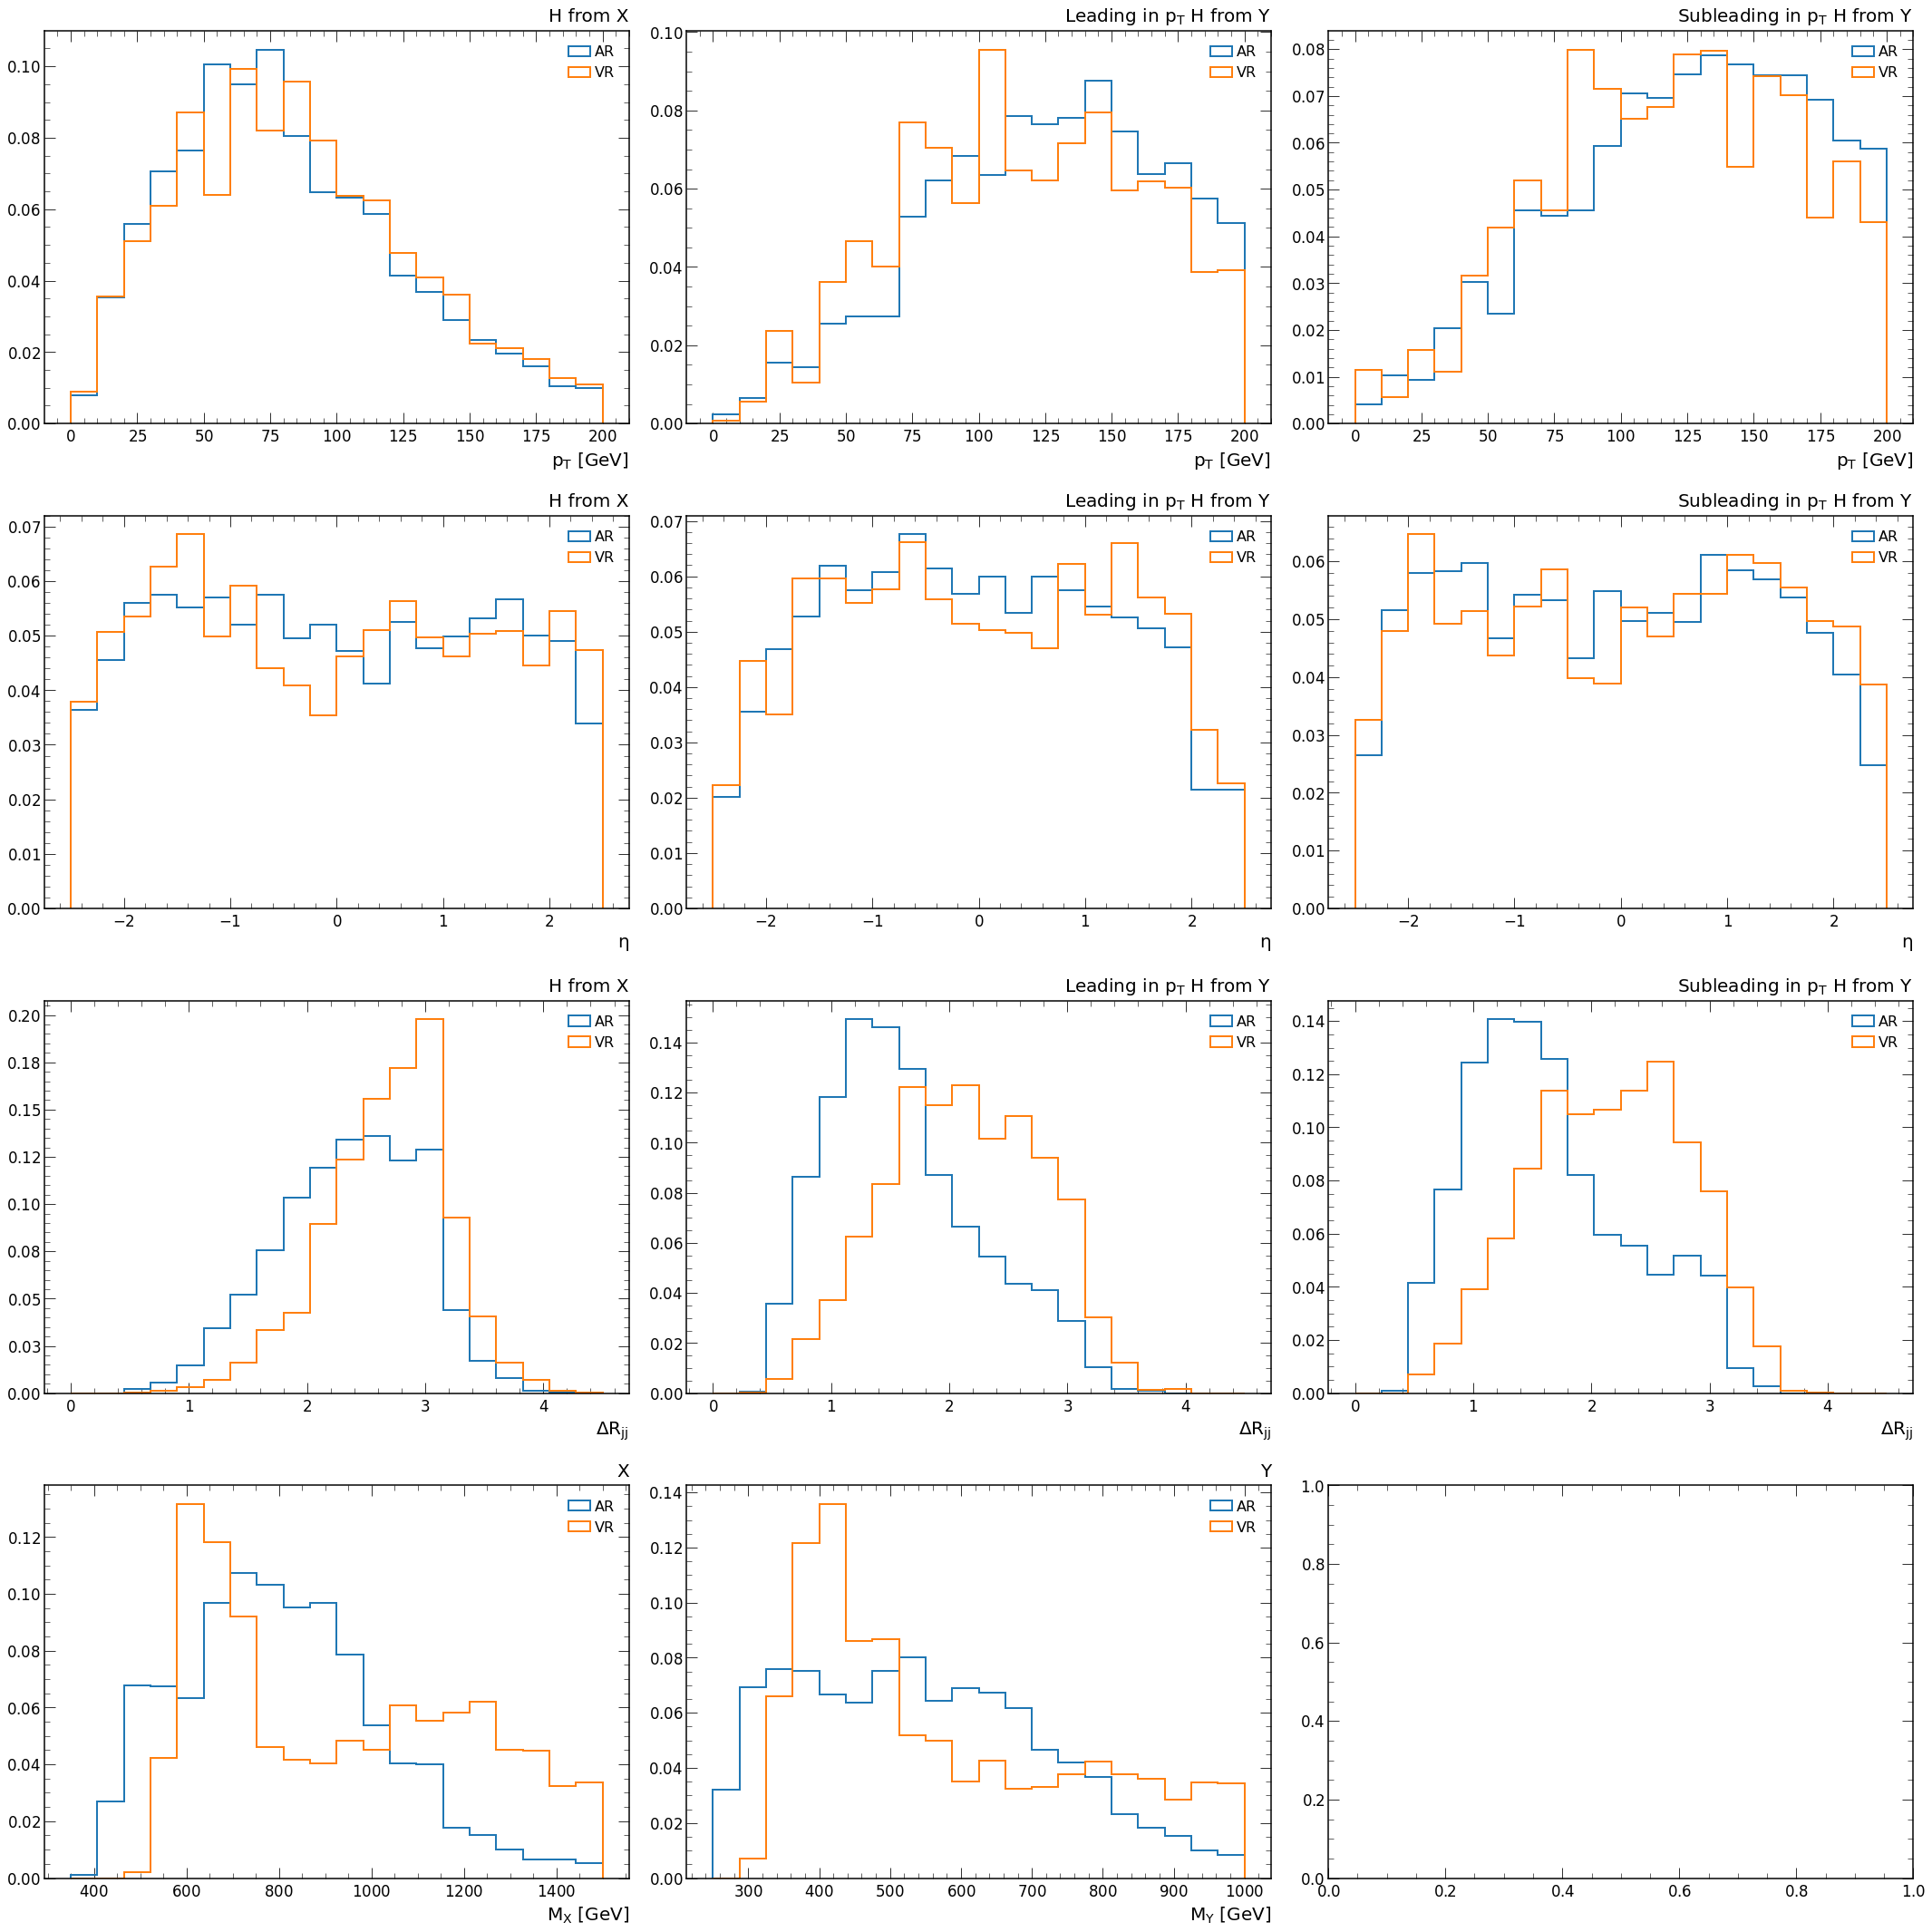

In [49]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))

for i,ax in enumerate(axs.flatten()):
    if len(variables) == i: break
    var = variables[i]
    edges = bins[i]
    xlabel = xlabels[i]

    n = gnn_bkg.hist(var, mask=gnn_ar_mask, bins=edges, ax=ax, color='C0', label='AR', density=True)    
    n = gnn_bkg.hist(var, mask=gnn_vr_mask, bins=edges, ax=ax, color='C1', label='VR', density=True)
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_title(ax_titles[i])

plt.tight_layout()

In [ ]:
xlabels = [r"$M(H_X)$ [GeV]", r"$M(H_1)$ [GeV]", r"$M(H_2)$ [GeV]"]

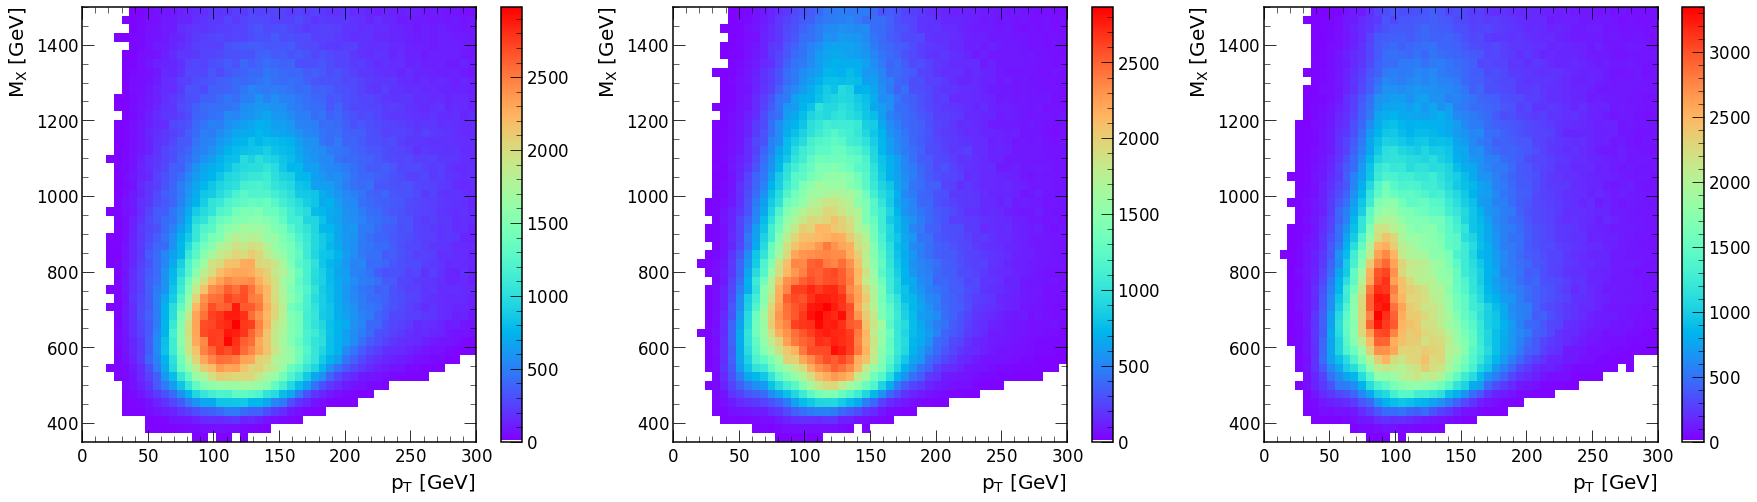

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,8))

n, ex, ey, im1 = Hist2d(gnn_bkg.HX.m, gnn_bkg.X.m, bins=[np.linspace(0,300,51),np.linspace(350,1500,51)], ax=axs[0])
n, ex, ey, im2 = Hist2d(gnn_bkg.H1.m, gnn_bkg.X.m, bins=[np.linspace(0,300,51),np.linspace(350,1500,51)], ax=axs[1])
n, ex, ey, im3 = Hist2d(gnn_bkg.H2.m, gnn_bkg.X.m, bins=[np.linspace(0,300,51),np.linspace(350,1500,51)], ax=axs[2])
im = [im1, im2, im3]

for i,ax in enumerate(axs.flatten()):
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel(r"$M_X$ [GeV]")
    fig.colorbar(im[i], ax=ax)